In [99]:
import pandas as pd
import numpy as np

df = pd.read_csv('car_data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Data Preparation

In [174]:
def PrepareStrings(strings):
    return strings.str.lower().str.replace(' ', '_')

df.columns = PrepareStrings(df.columns)

stringCols = df.dtypes[df.dtypes == 'object'].index
for col in stringCols:
    df[col] = PrepareStrings(df[col])
    df[col].unique()


In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

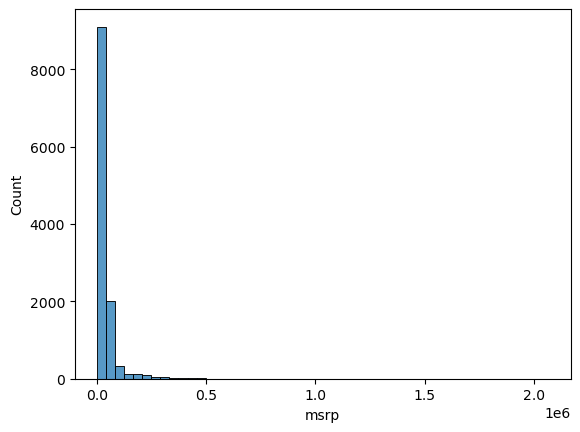

In [102]:
sns.histplot(df.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

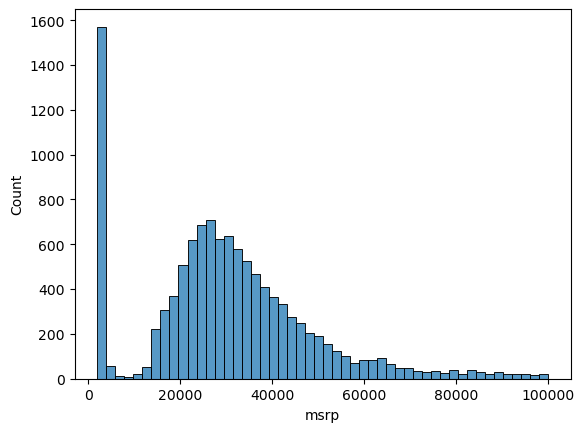

In [103]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [104]:
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

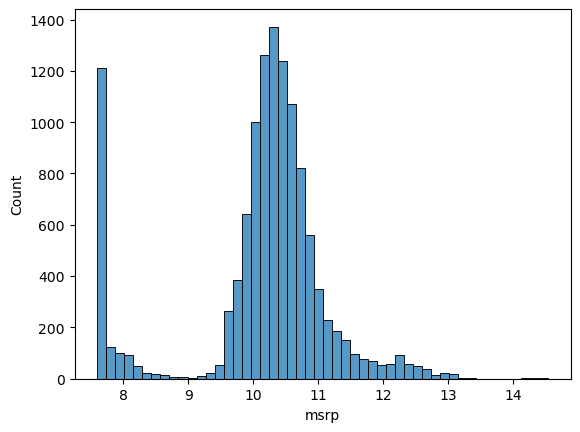

In [105]:

sns.histplot(price_logs, bins=50)

In [106]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [107]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n_val, n_test, n_train

(2382, 2382, 7150)

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#df.head()
y = price_logs
X = df.loc[:, df.columns != 'msrp']
X = X.select_dtypes(include='number')
X = X.fillna(0)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=n_val, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=n_test, random_state=0)
len(X_train), len(X_val), len(X_test), len(y_test)

(7150, 2382, 2382, 2382)

In [165]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
from LinReg_gradient_descent import LinearRegressionGD

lr_gd = LinearRegressionGD(l=0.001, iter=5000)
lr_gd.fit(X_train, y_train)

y_pr_gd = lr_gd.predict(X_test)

<Axes: xlabel='msrp', ylabel='Count'>

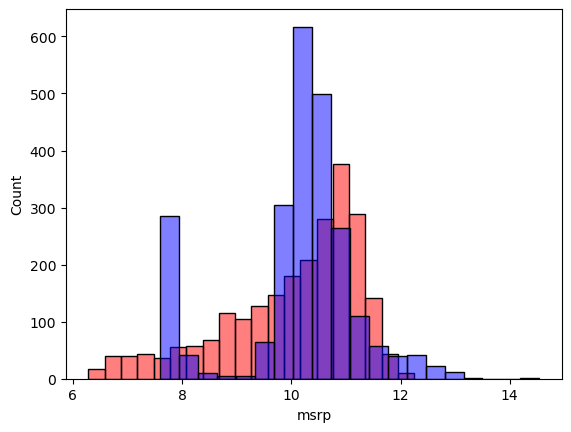

In [111]:
sns.histplot(y_pr_gd, color='red', alpha=0.5, bins=20)
sns.histplot(y_test, color='blue', alpha=0.5, bins=20)

In [112]:
def mse(y_1, y_2):
    return np.mean((y_1 - y_2)**2)

In [113]:
from LinReg_normal_equation import LinearRegressionNE

lr_ne = LinearRegressionNE()
lr_ne.fit(X_train, y_train)

y_pr_ne = lr_ne.predict(X_test)

<Axes: xlabel='msrp', ylabel='Count'>

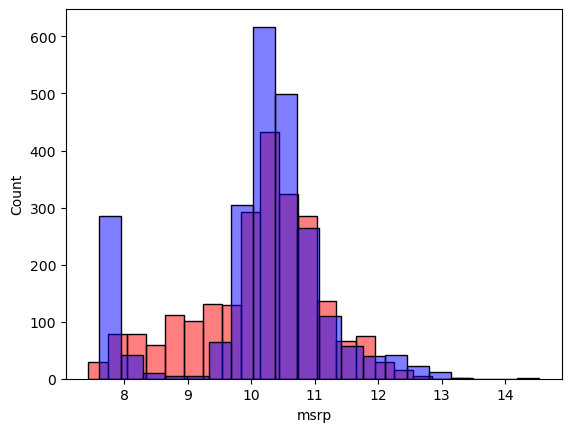

In [114]:
sns.histplot(y_pr_ne, color='red', alpha=0.5, bins=20)
sns.histplot(y_test, color='blue', alpha=0.5, bins=20)

In [123]:
mse_gd = mse(y_pr_gd, y_test)
mse_ne = mse(y_pr_ne, y_test)
mse_gd, mse_ne

(0.8864742557658379, 0.2627831120878375)

In [121]:
def rmse(y_1, y_2):
    mse_val = mse(y_1, y_2)
    return np.sqrt(mse_val)

In [122]:
rmse_gd = rmse(y_pr_gd, y_test)
rmse_ne = rmse(y_pr_ne, y_test)
rmse_gd, rmse_ne

(0.9415276181641397, 0.5126237529493123)

In [248]:
from sklearn.preprocessing import MinMaxScaler

def prepare_X(df):

    # convert categories to numbers
    X = pd.get_dummies(df)

    X = X.fillna(0)

    # normalize
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    return X
    


In [250]:
from sklearn.model_selection import train_test_split

def validation_split(X, y, test_size = 0.2, val_size = 0.2):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

    return (X_train, X_test, X_val, y_train, y_test, y_val)

In [267]:
y = price_logs
# leads to singular matrix in normal equation: 'make', 'model', 'market_category'
# ^after adding small number to diagonal, can use them ^significant improvement to quality of model
# soemthing wrong with: 'transmission_type', 'driven_wheels','vehicle_size', 'vehicle_style'
# ^after adding small number to diagonal, can use them ^
dfX= df[['transmission_type', 'driven_wheels', 'vehicle_size', 'vehicle_style', 'make', 'model', 'market_category', 'year', 'engine_fuel_type', 'number_of_doors', 'engine_hp', 'engine_cylinders', 'highway_mpg','city_mpg', 'popularity']]
X = prepare_X(dfX)

X_train, X_test, X_val, y_train, y_test, y_val = validation_split(X, y)
dfX.head()
    

,transmission_type,driven_wheels,vehicle_size,vehicle_style,make,model,market_category,year,engine_fuel_type,number_of_doors,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,manual,rear_wheel_drive,compact,coupe,bmw,1_series_m,"factory_tuner,luxury,high-performance",2011,premium_unleaded_(required),2.0,335.0,6.0,26,19,3916
1,manual,rear_wheel_drive,compact,convertible,bmw,1_series,"luxury,performance",2011,premium_unleaded_(required),2.0,300.0,6.0,28,19,3916
2,manual,rear_wheel_drive,compact,coupe,bmw,1_series,"luxury,high-performance",2011,premium_unleaded_(required),2.0,300.0,6.0,28,20,3916
3,manual,rear_wheel_drive,compact,coupe,bmw,1_series,"luxury,performance",2011,premium_unleaded_(required),2.0,230.0,6.0,28,18,3916
4,manual,rear_wheel_drive,compact,convertible,bmw,1_series,luxury,2011,premium_unleaded_(required),2.0,230.0,6.0,28,18,3916


In [332]:
from LinReg_gradient_descent import LinearRegressionGD

def run_lin_reg_gd(l=0.001, iter=5000, penalty=0.1):
    lr_gd = LinearRegressionGD(l, iter, penalty)
    lr_gd.fit(X_train, y_train)

    y_pred = lr_gd.predict(X_test)

    return y_pred

In [358]:
from sklearn.linear_model import Ridge

def run_skt_lin_reg_ridge(l=0.001, iter=5000, penalty=0.1):
    rdg = Ridge(alpha = penalty, max_iter=iter, solver='sag')
    rdg.fit(X_train, y_train)

    y_pred = rdg.predict(X_test)

    return y_pred

In [367]:
from sklearn.linear_model import LinearRegression

def run_skt_lin_reg():
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)

    return y_pred

In [380]:
from LinReg_normal_equation import LinearRegressionNE

def lin_reg_ne(regularization=0.1):
    lr_ne = LinearRegressionNE(regularization)
    lr_ne.fit(X_train, y_train)

    return lr_ne

def run_lin_reg_ne(regularization=0.1):
    lr_ne = lin_reg_ne(regularization)

    y_pred = lr_ne.predict(X_test)

    return y_pred

In [149]:
def plot_result(y_pred, y):
    rmse_res = rmse(y_pred, y)

    sns.histplot(y_pred, color='red', alpha=0.5, bins=20)
    pl = sns.histplot(y, color='blue', alpha=0.5, bins=20)
    pl.text(0, 0, "rmse="+ str(rmse_res))

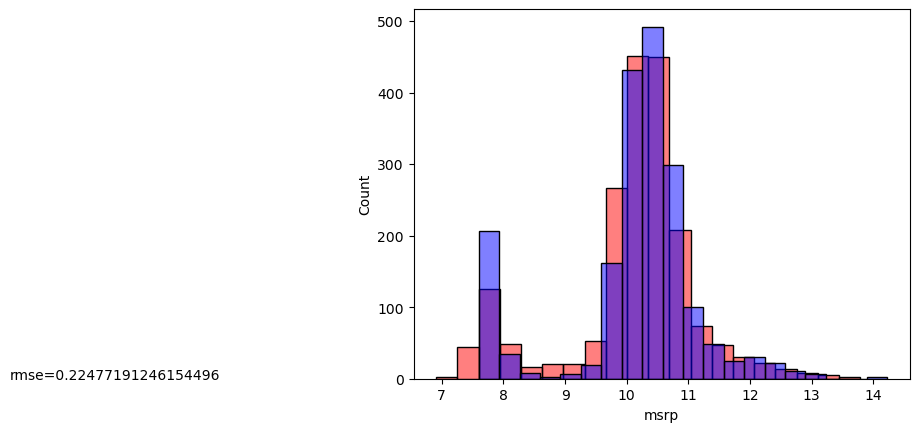

In [369]:
# higher alpha improves quality, but after 0.5 seems stops working, seems like regularization needed
pred_gd = run_lin_reg_gd(0.4, 5000, 0.1)
plot_result(pred_gd, y_test)

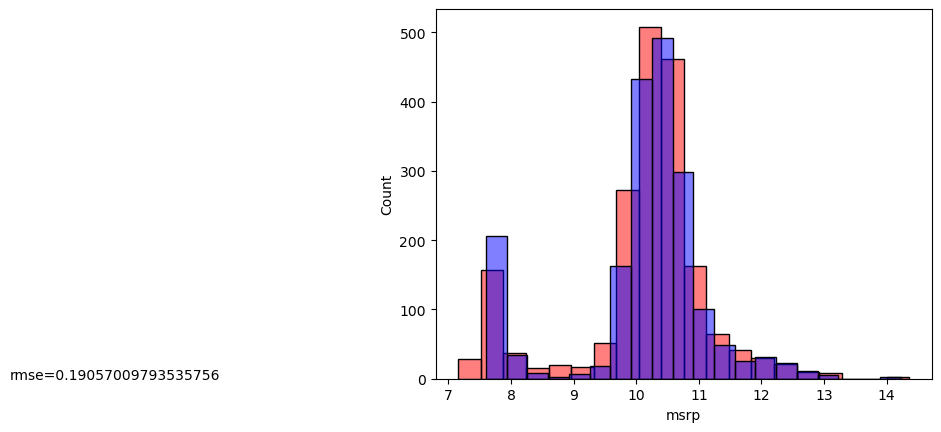

In [360]:
pred_skt_ridge = run_skt_lin_reg_ridge(0.4, 2000, 0.1)
plot_result(pred_skt_ridge, y_test)

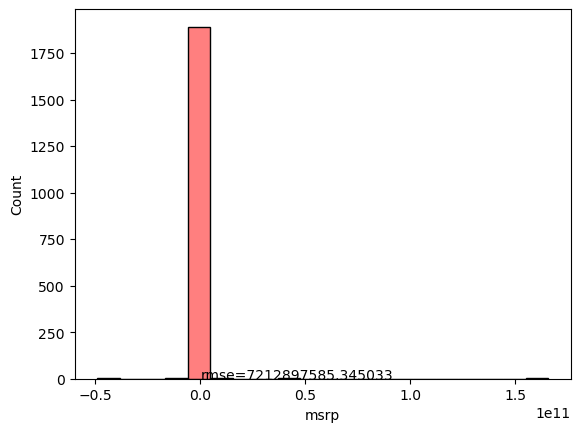

In [368]:
pred_skt = run_skt_lin_reg()
plot_result(pred_skt, y_test)

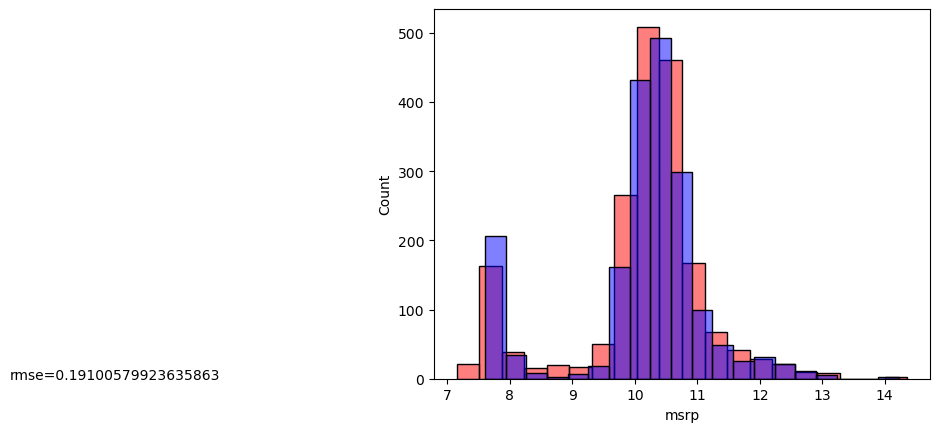

In [381]:

#X_train
pred_ne = run_lin_reg_ne(0.09)
plot_result(pred_ne, y_test)

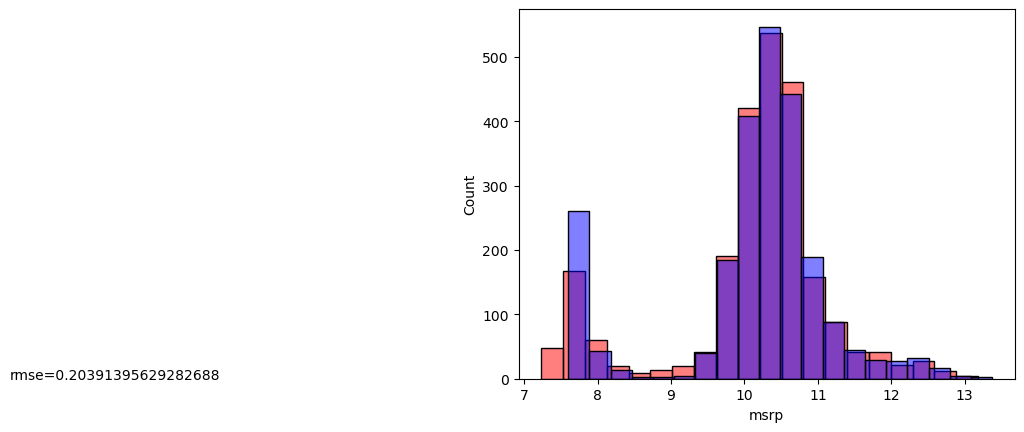

In [382]:
lr_ne_model = lin_reg_ne(0.09)
val_predict = lr_ne_model.predict(X_val)
plot_result(val_predict, y_val)